# **CLASE 5 - INTRO A MACHINE LEARNING**

## **REGRESIÓN LOGÍSTICA**

### Importamos librerías

In [2]:
# importar pandas
import pandas as pd

### Carga de datos

In [9]:
data = pd.read_csv("diabetes.csv")

In [8]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### División de datos

In [5]:
# Creamos una variable para nuestra columna target (variable dependiente)
y = data['Outcome']

In [6]:
# Creamos otra variable para la variable independiente
X = data[['BMI']]

In [7]:
# importamos train_test_split de sklearn
from sklearn.model_selection import train_test_split

In [8]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [10]:
# Utilizamos train_test_split para dividir nuestros datos en datos de testeo y datos de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=28, stratify=y)

### Selección del modelo de Regresión Logística

In [11]:
# Importamos de sklearn el modelo LogisticRegression
from sklearn.linear_model import LogisticRegression

# Llamamos al modelo
modelo = LogisticRegression()

In [12]:
# Entrenamos el modelo con .fit
modelo.fit(X_train, y_train)

LogisticRegression()

### Evaluar modelo

In [13]:
# Para regresión logística el score es el accuracy (exactitud)
# Datos de entrenamiento
modelo.score(X_train, y_train)

0.6596091205211726

In [14]:
# Accuracy (exactitud)
# Datos de testeo
modelo.score(X_test, y_test)

0.6948051948051948

### Regresión logística con más variables

In [17]:
# Creamos una variable para nuestra columna target (variable dependiente)
y_2 = data['Outcome']

In [18]:
# Creamos otra variable para la variable independiente
X_2 = data[["BMI", "Glucose", "Age", "Insulin", "SkinThickness"]]

In [19]:
# Utilizamos train_test_split para dividir nuestros datos en datos de testeo y datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Llamamos al modelo
modelo_2 = LogisticRegression()

In [21]:
# Entrenamos el modelo con .fit
modelo_2.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Para regresión logística el score es el accuracy (exactitud)
# Datos de entrenamiento
modelo_2.score(X_train, y_train)

0.7785016286644951

In [23]:
# Accuracy (exactitud)
# Datos de testeo
modelo_2.score(X_test, y_test)

0.7402597402597403

**VOLVER AL PPT**



---



---



---



# **MATRIZ DE CONFUSIÓN**

### y_pred

In [24]:
# Para construir la matriz, primero necesitamos las predicciones del modelo sobre los datos de testeo (X_test)
# Ante los valores de X_test el modelo nos dice su predicción
y_pred = modelo_2.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [34]:
# --- 4. MATRIZ DE CONFUSIÓN ---

# Importamos las métricas que vamos a usar
from sklearn.metrics import confusion_matrix

# importamos los scores
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

print("\n--- Análisis con Matriz de Confusión ---")

# Ahora comparamos las predicciones (y_pred) con los valores reales (y_test)

cm = confusion_matrix(y_test, y_pred)
print("*"*20)
print(f"Matriz de Confusión:\n{cm}")
print("*"*20)


--- Análisis con Matriz de Confusión ---
********************
Matriz de Confusión:
[[83 17]
 [23 31]]
********************


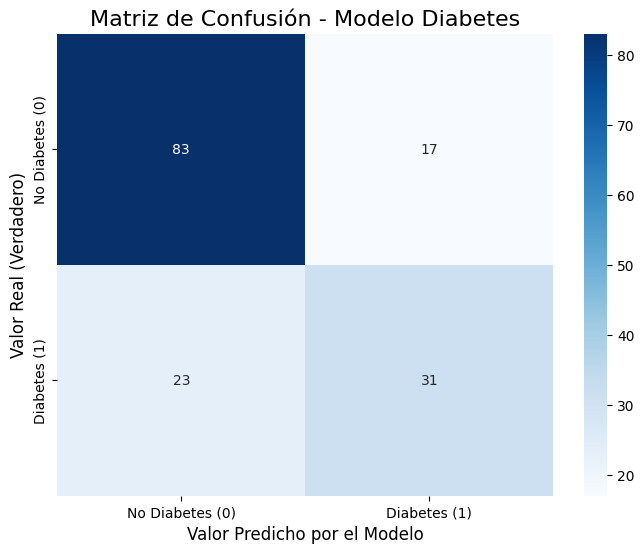

In [35]:
# importar matplotlib
import matplotlib.pyplot as plt

# importar seaborn
import seaborn as sns

# --- 5. VISUALIZACIÓN DE LA MATRIZ (HEATMAP) ---

# Usamos seaborn para crear un mapa de calor (heatmap)
plt.figure(figsize=(8, 6))

# Definimos las etiquetas para los ejes
labels = ['No Diabetes (0)', 'Diabetes (1)']

sns.heatmap(cm,
            annot=True,     # Muestra los números dentro de cada celda
            cmap='Blues',   # Paleta de colores azules
            xticklabels=labels,
            yticklabels=labels)

plt.title('Matriz de Confusión - Modelo Diabetes', fontsize=16)
plt.xlabel('Valor Predicho por el Modelo', fontsize=12)
plt.ylabel('Valor Real (Verdadero)', fontsize=12)

plt.show()

In [49]:
# --- 1. Valores Base (Extraídos de la Matriz de Confusión) ---

print("--- 1. Valores Base (Extraídos de la Matriz de Confusión) ---")

# Asignamos esos valores a variables claras:
vp = 31 # Verdadero Positivo (Real: Diabetes, Pred: Diabetes)
vn = 83 # Verdadero Negativo (Real: No Diabetes, Pred: No Diabetes)
fp = 17 # Falso Positivo (Real: No Diabetes, Pred: Diabetes) - ERROR TIPO I
fn = 23 # Falso Negativo (Real: Diabetes, Pred: No Diabetes) - ERROR TIPO II

print(f"\nVerdaderos Positivos (VP): {vp}")
print(f"\nVerdaderos Negativos (VN): {vn}")
print(f"\nFalsos Positivos (FP): {fp}")
print(f"\nFalsos Negativos (FN): {fn}")

# Calculamos el total de observaciones (pacientes) en la muestra de testeo
total = vp + vn + fp + fn
print(f"\nTotal de pacientes en el set de testeo: {total}")

--- 1. Valores Base (Extraídos de la Matriz de Confusión) ---

Verdaderos Positivos (VP): 31

Verdaderos Negativos (VN): 83

Falsos Positivos (FP): 17

Falsos Negativos (FN): 23

Total de pacientes en el set de testeo: 154


In [48]:
# --- 2. Cálculo de Accuracy (Exactitud) ---

print("\n--- 2. Accuracy (Exactitud) ---")

# Pregunta que responde: ¿Qué porcentaje del total de pacientes clasificamos correctamente?
# (Aciertos totales / Total de pacientes)
#
# Fórmula: (VP + VN) / (VP + VN + FP + FN)

accuracy = (vp + vn) / total

# Cálculo automático
acc = accuracy_score(y_test, y_pred)

print(f"\nFórmula: ({vp} + {vn}) / {total} = {accuracy:.4f}")
print(f"\nResultado Accuracy: {accuracy*100:.2f}%")
print(f"\nAccuracy: {acc:.4f} (Calculado automáticamente)")
print(f"\nInterpretación: El modelo acertó en su diagnóstico (tanto positivo como negativo) para el {accuracy*100:.2f}% del total de los {total} pacientes.")


--- 2. Accuracy (Exactitud) ---

Fórmula: (31 + 83) / 154 = 0.7403

Resultado Accuracy: 74.03%

Accuracy: 0.7403 (Calculado automáticamente)

Interpretación: El modelo acertó en su diagnóstico (tanto positivo como negativo) para el 74.03% del total de los 154 pacientes.


In [47]:
# --- 3. Cálculo de Precision (Precisión) ---

print("\n--- 3. Precision (Precisión) - para la clase 'Diabetes (1)' ---")

# Pregunta que responde: De todos los pacientes que el modelo *predijo* como 'Diabetes', ¿cuántos realmente lo eran?
# Mide la CALIDAD de las predicciones positivas.
#
# Fórmula: VP / (Predichos Positivos Totales) = VP / (VP + FP)

precision = vp / (vp + fp)

# Cálculo automático
prec = precision_score(y_test, y_pred)

print(f"\nFórmula: {vp} / ({vp} + {fp}) = {precision:.4f}")
print(f"\nResultado Precision: {precision*100:.2f}%")
print(f"\nPrecision (para Diabetes): {prec:.4f} (Calculado automáticamente)")
print(f"\nInterpretación: Cuando el modelo dice que un paciente tiene diabetes, acierta en el {precision*100:.2f}% de los casos.")
print(f"   -> El otro {(1-precision)*100:.2f}% de las veces que dijo 'Diabetes' fue una 'Falsa Alarma' (FP).")


--- 3. Precision (Precisión) - para la clase 'Diabetes (1)' ---

Fórmula: 31 / (31 + 17) = 0.6458

Resultado Precision: 64.58%

Precision (para Diabetes): 0.6458 (Calculado automáticamente)

Interpretación: Cuando el modelo dice que un paciente tiene diabetes, acierta en el 64.58% de los casos.
   -> El otro 35.42% de las veces que dijo 'Diabetes' fue una 'Falsa Alarma' (FP).


In [50]:
# --- 4. Cálculo de Recall (Sensibilidad o Exhaustividad) ---

print("\n--- 4. Recall (Sensibilidad) - para la clase 'Diabetes (1)' ---")

# Pregunta que responde: De todos los pacientes que *realmente* tienen 'Diabetes', ¿a cuántos logró 'encontrar' el modelo?
# Mide la CAPACIDAD del modelo para encontrar todos los casos positivos.
#
# Fórmula: VP / (Reales Positivos Totales) = VP / (VP + FN)

recall = vp / (vp + fn)

# Cálculo automático
rec = recall_score(y_test, y_pred)

print(f"\nFórmula: {vp} / ({vp} + {fn}) = {recall:.4f}")
print(f"\nResultado Recall: {recall*100:.2f}%")
print(f"\nRecall (para Diabetes): {rec:.4f} (Calculado automáticamente)")
print(f"\nInterpretación: El modelo logró encontrar (y diagnosticar correctamente) al {recall*100:.2f}% de todos los pacientes que realmente tenían diabetes.")
print(f"   -> Se le 'escaparon' (FN) el {(1-recall)*100:.2f}% de los diabéticos reales, diagnosticándolos incorrectamente como 'No Diabetes'.")



--- 4. Recall (Sensibilidad) - para la clase 'Diabetes (1)' ---

Fórmula: 31 / (31 + 23) = 0.5741

Resultado Recall: 57.41%

Recall (para Diabetes): 0.5741 (Calculado automáticamente)

Interpretación: El modelo logró encontrar (y diagnosticar correctamente) al 57.41% de todos los pacientes que realmente tenían diabetes.
   -> Se le 'escaparon' (FN) el 42.59% de los diabéticos reales, diagnosticándolos incorrectamente como 'No Diabetes'.


In [56]:
# --- 5. Cálculo de F1-Score ---

print("\n--- 5. F1-Score - para la clase 'Diabetes (1)' ---")

# Pregunta que responde: ¿Cuál es el balance entre Precision y Recall?
# Es útil para tener una sola métrica que combine ambas.
#
# Fórmula: 2 * (Precision * Recall) / (Precision + Recall)

f1_score_manual = 2 * (precision * recall) / (precision + recall)

# Cálculo automático
f1 = f1_score(y_test, y_pred)

print(f"\nFórmula: 2 * ({precision:.4f} * {recall:.4f}) / ({precision:.4f} + {recall:.4f}) = {f1_score_manual:.4f}")
print(f"\nResultado F1-Score: {f1_score_manual*100:.2f}%")
print(f"\nF1-Score (para Diabetes): {f1:.4f} (Calculado automáticamente)")
print(f"\nInterpretación: El {f1_score_manual*100:.2f}% es la puntuación de balance. Es una buena métrica general si nos importa tanto la Precision como el Recall.")
print("\n--- Fin de los Cálculos ---")


--- 5. F1-Score - para la clase 'Diabetes (1)' ---

Fórmula: 2 * (0.6458 * 0.5741) / (0.6458 + 0.5741) = 0.6078

Resultado F1-Score: 60.78%

F1-Score (para Diabetes): 0.6078 (Calculado automáticamente)

Interpretación: El 60.78% es la puntuación de balance. Es una buena métrica general si nos importa tanto la Precision como el Recall.

--- Fin de los Cálculos ---




---



---



---

